In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
df = pd.read_csv("Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.info()
df['Score'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [8]:
def convert_sentiment(score):
    if score <= 2:
        return 0   # Negative
    elif score == 3:
        return 2   # Neutral
    else:
        return 1   # Positive

df['Sentiment'] = df['Score'].apply(convert_sentiment)


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['Clean_Text'] = df['Text'].apply(clean_text)


In [10]:
X = df['Clean_Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [12]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test_tfidf)


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8662075274208161


In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.67      0.70     16181
           1       0.90      0.97      0.93     89025
           2       0.51      0.17      0.25      8485

    accuracy                           0.87    113691
   macro avg       0.71      0.60      0.63    113691
weighted avg       0.85      0.87      0.85    113691



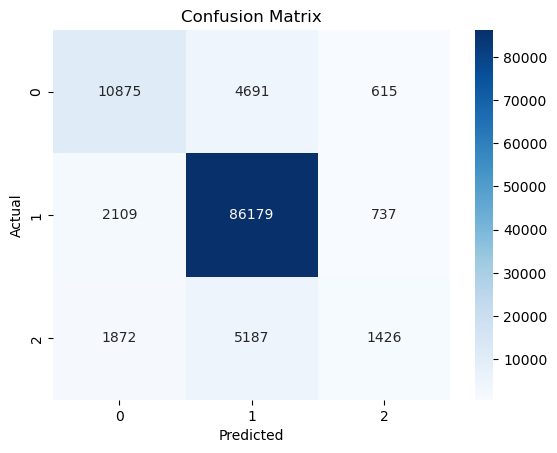

In [16]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
sample_review = ["This product is really amazing and worth the money"]

sample_clean = [clean_text(sample_review[0])]
sample_vector = tfidf.transform(sample_clean)

prediction = model.predict(sample_vector)

if prediction[0] == 1:
    print("Positive Review ")
else:
    print("Negative Review ")


Positive Review 


In [18]:
sample_review = ["I received a very different product not what i ordered they did not give refund "]

sample_clean = [clean_text(sample_review[0])]
sample_vector = tfidf.transform(sample_clean)

prediction = model.predict(sample_vector)

if prediction[0] == 1:
    print("Positive Review ")
else:
    print("Negative Review ")

Negative Review 


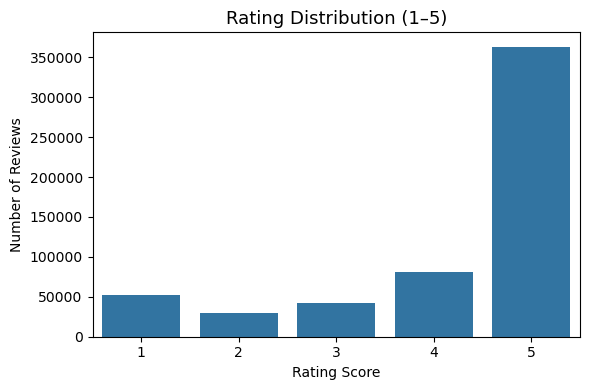

In [19]:
plt.figure(figsize=(6,4))

sns.countplot(x='Score', data=df, order=sorted(df['Score'].unique()))

plt.title("Rating Distribution (1–5)", fontsize=13)
plt.xlabel("Rating Score")
plt.ylabel("Number of Reviews")

plt.tight_layout()
plt.show()


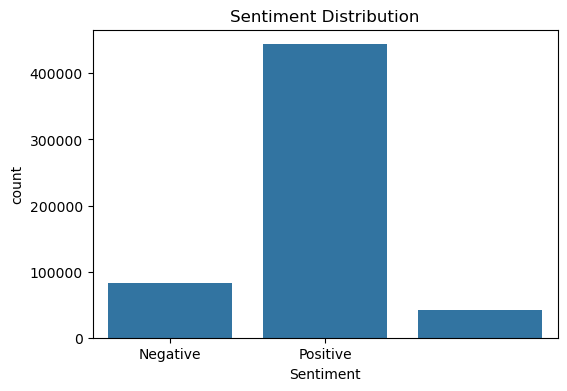

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xticks([0,1], ["Negative", "Positive"])
plt.show()
